## LSTM

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
import re, string
import sys
import pickle
import warnings
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def w_len(s):
    try:
        return len(re.split(r'\W+',s))
    except:
        return np.nan

pd0=pd.read_excel('C:/Users/nwang/Desktop/nlp/code/tag_w_score.xlsx')
pd0['len']=pd0['text'].apply(w_len)


def label_to_num(s):
    try:
        dt = {'Mixed':'0',
                'Positive':'1',
                'Neutral': '2',
                'Negative':'3',}
        return int(dt[str(s)])
    except:
        return np.nan
pd0['x']=pd0['x'].apply(label_to_num)
pd0.dropna(subset=['x'],inplace=True)
pd0.fillna(0,inplace=True)
# pd0['aux']=pd0['Recommend_score']+pd0['Satisfaction_Value']

In [5]:
q1=pd0.iloc[:13791,-5:]
q2=pd0.iloc[13791:,-5:]
q1.head(5)
q2.head(5)

,x,Recommend_score,Satisfaction_Value,text,len
0,0.0,5.0,5.0,"The interest rates are nice, but Alliant has p...",73.0
1,1.0,8.0,0.0,"Good rates, fast transfers",4.0
2,1.0,10.0,0.0,Great interest rates on both checking and savi...,24.0
3,1.0,10.0,0.0,"Very convenient, and great rates",5.0
4,1.0,10.0,0.0,"Excellent rates, service, website",4.0


,x,Recommend_score,Satisfaction_Value,text,len
14923,2.0,10.0,10.0,Not sure.,3.0
14925,1.0,10.0,10.0,Mike made this process very easy! He is very p...,15.0
14926,3.0,7.0,9.0,To be able see account at a glance,8.0
14927,3.0,8.0,6.0,Show a running tally of debit & credits,7.0
14928,1.0,10.0,10.0,I like the current features offered.,7.0


In [9]:
q1.loc[(q1['Recommend_score']==10) & (q1['x']==0)]

,x,Recommend_score,Satisfaction_Value,text,len
32,0.0,10.0,NaN,Great rates Great customer service Good relati...,43.0
35,0.0,10.0,NaN,Offers best rates in the market. Please run mo...,12.0
99,0.0,10.0,NaN,"Alliant has a great variety of credit options,...",56.0
561,0.0,10.0,9.0,Most people I know are already well establishe...,197.0
564,0.0,10.0,9.0,My representative asked me my security questio...,33.0
664,0.0,10.0,9.0,Knowledge and friendly. Please do not have cu...,17.0
743,0.0,10.0,10.0,Excellent rates. Reasonably good internet int...,22.0
960,0.0,10.0,10.0,I am satisfied with my platinum rewards credit...,18.0
1009,0.0,10.0,10.0,The cash rebate but I will prefer if you have ...,27.0
1078,0.0,10.0,9.0,"Before my laat call, Alliant has always been ...",25.0


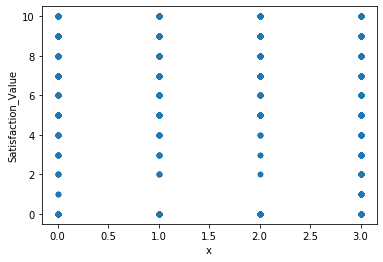

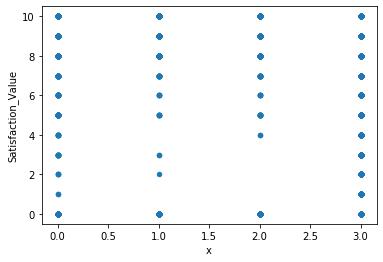

In [14]:
q1.plot.scatter(y='Satisfaction_Value',x='x')
q2.plot.scatter(y='Satisfaction_Value',x='x')

(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2DCC23C88>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2DCD69A58>,
       dtype=object))

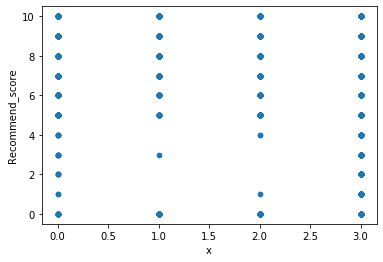

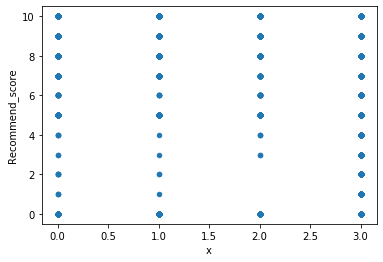

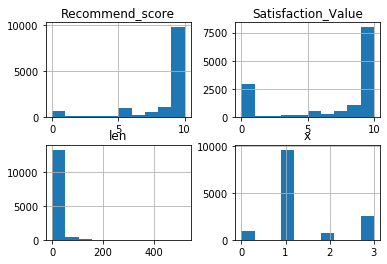

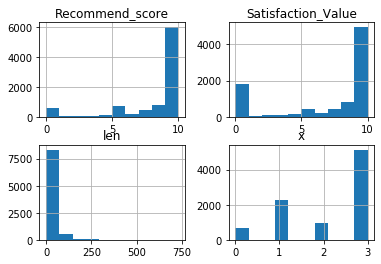

In [39]:
q1.plot.scatter(y='Recommend_score',x='x')
q2.plot.scatter(y='Recommend_score',x='x')
q1.hist(),q2.hist()

In [6]:
df=q1
df=df.loc[df['len']<24]
df.shape

(11599, 5)

In [7]:
df.x.value_counts()

1.0    8767
3.0    1831
2.0     617
0.0     384
Name: x, dtype: int64

In [20]:
y_3=df['x'].loc[df['x']==3].head(384)
x_3=df[['text']].loc[df['x']==3].head(384)
y_2=df['x'].loc[df['x']==2].head(384)
x_2=df[['text']].loc[df['x']==2].head(384)
y_1=df['x'].loc[df['x']==1].head(384)
x_1=df[['text']].loc[df['x']==1].head(384)
y_0=df['x'].loc[df['x']==0].head(384)
x_0=df[['text']].loc[df['x']==0].head(384)
y=pd.concat([pd.concat([y_3,y_2]),pd.concat([y_1,y_0])])
x=pd.concat([pd.concat([x_3,x_2]),pd.concat([x_1,x_0])])
x.shape,y.shape

((1554, 1), (1554,))

In [8]:
x_3=df[['text','x','Recommend_score','Satisfaction_Value','len']].loc[df['x']==3].head(384)

x_2=df[['text','x','Recommend_score','Satisfaction_Value','len']].loc[df['x']==2].head(384)

x_1=df[['text','x','Recommend_score','Satisfaction_Value','len']].loc[df['x']==1].head(384)

x_0=df[['text','x','Recommend_score','Satisfaction_Value','len']].loc[df['x']==0].head(384) #390

x=pd.concat([pd.concat([x_3,x_2]),pd.concat([x_1,x_0])])
x = x.sample(frac=1).reset_index(drop=True)
x.shape

(1536, 5)

In [10]:
transtbl = str.maketrans(string.punctuation, ' '*len(string.punctuation))
def text_clean(text):
        if not isinstance(text,float) :
            text=str(text)
            text = ' '.join([appos[we] if we in appos else we for we in text.split()])
            text =text.translate(transtbl)
    #         tokens = [lemmatizer.lemmatize(t.lower(),'v')
    #                  for t in nltk.word_tokenize(text)
    #                  if t.lower() not in stopwords]
            return ' '.join(text.split())
        else:
            return np.nan

In [13]:
x['text']= x['text'].values.astype('str')
x['text']= x.text.apply(text_clean)
dfsmall=x#.head(452)
train,test=dfsmall.head(1152),dfsmall.tail(384)
train['x']=train['x'].values.astype('int')
test['x']=test['x'].values.astype('int')

train.to_csv('C:/Users/nwang/Desktop/nlp/code/q1_balance_1152_5_train.csv',header=True,index=False)
test.to_csv('C:/Users/nwang/Desktop/nlp/code/q1_balance_384_5_test.csv',header=True,index=False)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
train.text.loc[ train['text'].str.contains('overdraft')].values
train.text.head(10).values

array(['No fees for inactivity or whatever .., my other credit union only has fees for overdraft'],
      dtype=object)

array(['Setting up the new account was easy.  Is it possible to make all accounts downloadable to Quicken again?',
       'Better customer service', 'It was so easy and quick', '0',
       'Clearly state options available given all considered circumstances.',
       'No fees for inactivity or whatever .., my other credit union only has fees for overdraft',
       'Om', 'Nothing comes to mind',
       'I think your desktop website could be easier to navigate. The mobile app is fantastic.',
       'Nothing it was easy but after I opened my account it was frozen an locked me out for 5days'],
      dtype=object)

In [48]:
dfsmall=x.head(452)
train,test=dfsmall.head(339),dfsmall.tail(113)
trainaux=np.array(train['Recommend_score']).reshape(train.shape[0],1)
testaux=np.array(test['Recommend_score']).reshape(test.shape[0],1)
trainaux2=np.array(train[['Recommend_score','Satisfaction_Value']]).reshape(train.shape[0],2)
testaux2=np.array(test[['Recommend_score','Satisfaction_Value']]).reshape(test.shape[0],2)
trainaux3=np.array(train[['Recommend_score','Satisfaction_Value','len']]).reshape(train.shape[0],3)
testaux3=np.array(test[['Recommend_score','Satisfaction_Value','len']]).reshape(test.shape[0],3)
X_train, Y_train,X_test, Y_test= map(np.array,[train['text'].values.astype('str'),train['x'].values.astype('int'),test['text'].values.astype('str'), test['x'].values.astype('int')])

In [21]:
y=y.astype(int)
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.3,shuffle=True,random_state=67,stratify=y)

In [39]:
df = df.sample(frac=0.2607).reset_index(drop=True) #0.1345
df.shape

(1560, 5)

In [40]:

dfsmall=df.head(1560)
train,test=dfsmall.head(1170),dfsmall.tail(390)
trainaux=np.array(train['Recommend_score']).reshape(train.shape[0],1)
testaux=np.array(test['Recommend_score']).reshape(test.shape[0],1)
trainaux2=np.array(train[['Recommend_score','Satisfaction_Value']]).reshape(train.shape[0],2)
testaux2=np.array(test[['Recommend_score','Satisfaction_Value']]).reshape(test.shape[0],2)
trainaux3=np.array(train[['Recommend_score','Satisfaction_Value','len']]).reshape(train.shape[0],3)
testaux3=np.array(test[['Recommend_score','Satisfaction_Value','len']]).reshape(test.shape[0],3)
X_train, Y_train,X_test, Y_test= map(np.array,[train['text'].values.astype('str'),train['x'].values.astype('int'),test['text'].values.astype('str'), test['x'].values.astype('int')])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 24)                0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 24, 50)            20000050  
_________________________________________________________________
lstm_45 (LSTM)               (None, 24, 128)           91648     
_________________________________________________________________
dropout_45 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_46 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total para

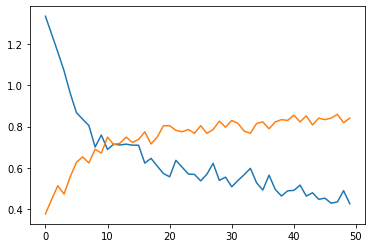

In [54]:
from LSTMmodel import LSTMmodel
c_model=LSTMmodel()
c_model.fit_predict(X_train, X_test, Y_train, Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 24)                0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 24, 50)            20000050  
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 24, 256)           183296    
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 256)           0         
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 1028      
Total para

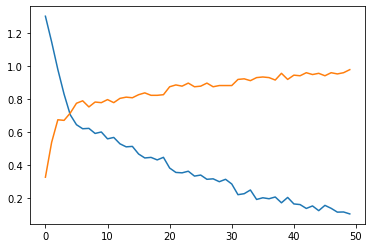

In [50]:
from BiLSTMmodel import BiLSTMmodel
c_model=BiLSTMmodel()
c_model.fit_predict(X_train, X_test, Y_train, Y_test)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 24, 50)       20000050    input_29[0][0]                   
__________________________________________________________________________________________________
bidirectional_29 (Bidirectional (None, 24, 256)      183296      embedding_20[0][0]               
__________________________________________________________________________________________________
dropout_39 (Dropout)            (None, 24, 256)      0           bidirectional_29[0][0]           
__________________________________________________________________________________________________
bidirectio

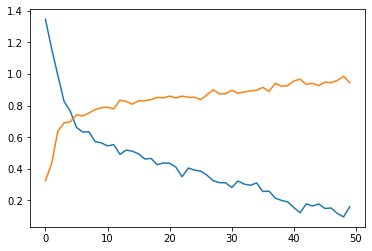

In [51]:
from BiLSTMmodel_aux import BiLSTMmodel #1 scores
c_model=BiLSTMmodel()
c_model.fit_predict(X_train, X_test, Y_train, Y_test,trainaux,testaux,d=1 ,epochs=50)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 24, 50)       20000050    input_31[0][0]                   
__________________________________________________________________________________________________
bidirectional_31 (Bidirectional (None, 24, 256)      183296      embedding_21[0][0]               
__________________________________________________________________________________________________
dropout_41 (Dropout)            (None, 24, 256)      0           bidirectional_31[0][0]           
__________________________________________________________________________________________________
bidirectio

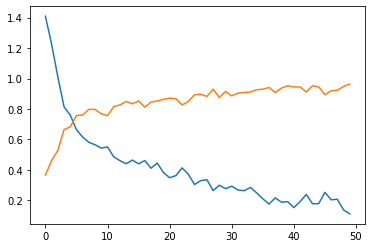

In [52]:
from BiLSTMmodel_aux import BiLSTMmodel #2 scores
c_model=BiLSTMmodel()
c_model.fit_predict(X_train, X_test, Y_train, Y_test,trainaux2,testaux2,d=2 ,epochs=50)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           (None, 24)           0                                            
__________________________________________________________________________________________________
embedding_22 (Embedding)        (None, 24, 50)       20000050    input_33[0][0]                   
__________________________________________________________________________________________________
bidirectional_33 (Bidirectional (None, 24, 256)      183296      embedding_22[0][0]               
__________________________________________________________________________________________________
dropout_43 (Dropout)            (None, 24, 256)      0           bidirectional_33[0][0]           
__________________________________________________________________________________________________
bidirectio

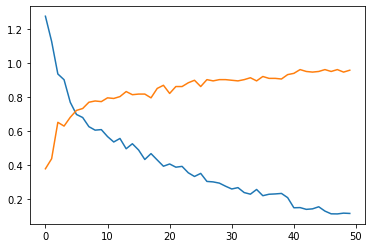

In [53]:
from BiLSTMmodel_aux import BiLSTMmodel #3 score
c_model=BiLSTMmodel()
c_model.fit_predict(X_train, X_test, Y_train, Y_test,trainaux3,testaux3, epochs=50)

In [10]:
from BiLSTMmodel import BiLSTMmodel
c_model=BiLSTMmodel()
c_model.pretrain(X_test)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


array([2, 2, 2, 1, 0, 3, 3, 3, 1, 3, 1, 3, 3, 1, 0, 0, 2, 3, 1, 2, 1, 1,
       2, 2, 2, 0, 2, 3, 2, 0, 0, 2, 1, 2, 0, 3, 0, 3, 0, 2, 1, 3, 1, 3,
       0, 1, 2, 0, 1, 2, 3, 1, 0, 3, 2, 0, 1, 2, 0, 3, 0, 1, 3, 0, 2, 0,
       3, 3, 0, 2, 0, 0, 2, 2, 3, 2, 0, 3, 3, 3, 0, 0, 3, 2, 1, 0, 0, 3,
       0, 3, 3, 2, 1, 2, 0, 0, 0, 2, 0, 1, 3, 2, 3, 2, 1, 3, 1, 1, 1, 2,
       0, 0, 1, 1, 2, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 0, 3, 2, 1, 3, 3,
       2, 2, 1, 1, 0, 3, 3, 3, 0, 0, 2, 2, 3, 0, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 1, 1, 3, 1, 3, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 1, 1, 0, 1, 3, 0, 2, 0, 1, 2, 3, 1, 1, 0, 0, 3, 3,
       2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 2, 0, 1, 3,
       0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1,
       1, 2, 1, 1, 0, 2, 3, 0, 0, 3, 2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 0, 1, 0, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2,

In [11]:
Y_test

array([1, 2, 2, 1, 3, 0, 3, 3, 1, 3, 1, 3, 3, 1, 0, 0, 2, 3, 1, 3, 1, 1,
       2, 2, 1, 0, 2, 3, 2, 2, 0, 2, 1, 2, 0, 3, 3, 3, 1, 1, 1, 3, 2, 3,
       0, 1, 2, 3, 0, 3, 3, 1, 0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 3, 1, 2, 0,
       3, 3, 3, 2, 2, 0, 2, 2, 3, 2, 0, 3, 2, 3, 0, 1, 0, 1, 1, 2, 0, 3,
       3, 0, 3, 2, 1, 2, 0, 2, 0, 0, 0, 1, 3, 2, 3, 2, 1, 3, 0, 1, 3, 0,
       1, 3, 2, 1, 3, 0, 0, 1, 2, 3, 1, 0, 2, 3, 1, 1, 0, 3, 2, 1, 0, 3,
       3, 2, 1, 1, 0, 3, 2, 3, 0, 0, 1, 3, 2, 0, 2, 3, 1, 2, 3, 0, 0, 0,
       2, 0, 2, 3, 1, 3, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 0, 2,
       0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3,
       2, 0, 3, 1, 2, 2, 2, 0, 1, 3, 0, 2, 0, 1, 2, 3, 3, 1, 1, 2, 3, 3,
       2, 0, 2, 1, 1, 1, 3, 3, 2, 0, 3, 3, 2, 0, 3, 3, 3, 1, 3, 0, 1, 3,
       0, 1, 1, 2, 2, 0, 2, 3, 1, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 1,
       1, 2, 3, 1, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 2, 0, 0, 0, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3,

In [15]:
c_model.pre_probability

In [119]:
X_test[:6],Y_test[:6]

(array(['How can you be a member without working for ual',
        'have not had much experience on using this account yet',
        'You have a great team of people working Great company',
        'Not available in Arizona too difficult to use as primary',
        'No notification communication about my checking account changes very disappointing',
        'at this moment i do not see any improvement needed'], dtype=object),
 array([1, 2, 3, 1, 1, 2]))

In [12]:
    
appos = {

"aren't" : "are not",

"can't" : "cannot",

"couldn't" : "could not",

"didn't" : "did not",

"doesn't" : "does not",

"don't" : "do not",

"hadn't" : "had not",

"hasn't" : "has not",

"haven't" : "have not",

"he'd" : "he would",

"he'll" : "he will",

"he's" : "he is",

"i'd" : "I would",

"i'd" : "I had",

"i'll" : "I will",

"i'm" : "I am",

"isn't" : "is not",

"it's" : "it is",

"it'll":"it will",

"i've" : "I have",

"let's" : "let us",

"mightn't" : "might not",

"mustn't" : "must not",

"shan't" : "shall not",

"she'd" : "she would",

"she'll" : "she will",

"she's" : "she is",

"shouldn't" : "should not",

"that's" : "that is",

"there's" : "there is",

"they'd" : "they would",

"they'll" : "they will",

"they're" : "they are",

"they've" : "they have",

"we'd" : "we would",

"we're" : "we are",

"weren't" : "were not",

"we've" : "we have",

"what'll" : "what will",

"what're" : "what are",

"what's" : "what is",

"what've" : "what have",

"where's" : "where is",

"who'd" : "who would",

"who'll" : "who will",

"who're" : "who are",

"who's" : "who is",

"who've" : "who have",

"won't" : "will not",

"wouldn't" : "would not",

"you'd" : "you would",

"you'll" : "you will",

"you're" : "you are",

"you've" : "you have",

"'re": " are",

"wasn't": "was not",

"we'll":" will",

"didn't": "did not"

}